In [1]:
import math
from sympy import  Symbol, S, sin, Limit, Derivative, sympify, pprint
import numpy as np
import matplotlib.pyplot as plt

# Functions

- A mapping between an input set and an output set
- Exactly one element corresponds

![function](imgs/calculus/function.png)

- **Domain:** Set of input values that the independent variable can be
- **Range:** Set of output values that the dependent variable can be

# Limits

A common task in calculus is finding the limiting value (or simply the limit) of the function, when the variable’s value is assumed to approach a certain value.

![limit 1](imgs/calculus/limit_1.png)
![limit 2](imgs/calculus/limit_2.png)

/Users/osx10/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide


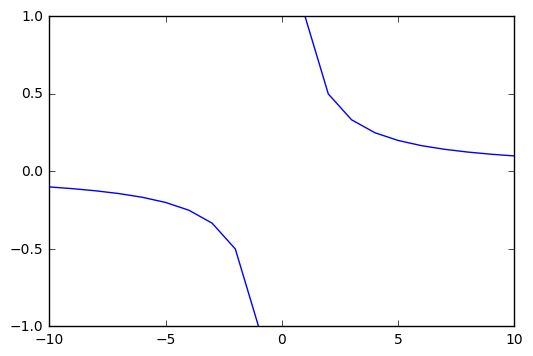

In [2]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return 1/x

graph(my_formula, range(-10, 11))

In [3]:
x = Symbol('x')
Limit(1/x, x, S.Infinity)

Limit(1/x, x, oo, dir='-')

In [4]:
l = Limit(1/x, x, S.Infinity)
l.doit()

0

In [5]:
Limit(1/x, x, 0, dir='-').doit()

-oo

In [6]:
Limit(1/x, x, 0, dir='+').doit()

oo

# Derivatives

The derivative of a function **y=f(x)** expresses the rate of change in the dependent variable, **y**, with respect to the independent variable, **x**. It's often denoted as **dy/dx**.

![derivative](imgs/calculus/derivative.png)

In [7]:
# acceleration equation for the motion of a car
t = Symbol('t')
St = 5*t**2 + 2*t + 8
Derivative(St, t)

Derivative(5*t**2 + 2*t + 8, t)

In [8]:
d = Derivative(St, t)
d.doit()

10*t + 2

In [9]:
d.doit().subs({t:1})

12

In [10]:
# Derivative Calculator
from sympy.core.sympify import SympifyError

def derivative(f, var):
    var = Symbol(var)
    d = Derivative(f, var).doit()
    pprint(d)
    
def process_function():
    f = input('Enter a function: ')
    var = input('Enter the variable to differentiate with respect to: ')

    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid input')
    else:
        derivative(f, var)

**Partial derivatives**

![partial](imgs/calculus/partial.png)

In [11]:
# Use calculator
process_function()

Enter a function: 2*y + y**2
Enter the variable to differentiate with respect to: y
2⋅y + 2


# Maxima and Minima

- find the first-order derivative
- solve for 0 to find critical points: local and global max and min

![maxima](imgs/calculus/maxima.png)

In [12]:
from sympy import Symbol, solve, Derivative
x = Symbol('x')
f = x**5 - 30*x**3 + 50*x
d1 = Derivative(f, x).doit()

In [13]:
critical_points = solve(d1)
critical_points

[-sqrt(-sqrt(71) + 9),
 sqrt(-sqrt(71) + 9),
 -sqrt(sqrt(71) + 9),
 sqrt(sqrt(71) + 9)]

In [14]:
A = critical_points[2]
B = critical_points[0]
C = critical_points[1]
D = critical_points[3]

Because all the critical points for this function lie within the considered interval, they are all relevant for our search for the global maximum and minimum of f(x). We may now apply the so-called second derivative test to narrow down which critical points could be global maxima or minima.

In [19]:
d2 = Derivative(f, x, 2).doit()

In [20]:
d2.subs({x:B}).evalf()

127.661060789073

In [21]:
d2.subs({x:C}).evalf()

-127.661060789073

In [22]:
d2.subs({x:A}).evalf()

-703.493179468151

In [23]:
d2.subs({x:D}).evalf()

703.493179468151

Thus, to find the global maximum, we must compute the value of f(x)
at the points A, C, −5, and 5. Among these points, the place where f(x) has
the largest value must be the global maximum.

In [24]:
x_min = -5
x_max = 5

f.subs({x:A}).evalf()

705.959460380365

In [25]:
f.subs({x:C}).evalf()

25.0846626340294

In [26]:
f.subs({x:x_min}).evalf()

375.000000000000

In [27]:
f.subs({x:x_max}).evalf()

-375.000000000000

Repeat with points B, D for global minimum

# Integrals

The indefinite integral, or the antiderivative, of a function f(x) is another function F(x), such that F′(x) = f(x). That is, the integral of a function is another function whose derivative is the original function.

In [28]:
from sympy import Integral, Symbol
x = Symbol('x')
k = Symbol('k')
Integral(x**2, x)

Integral(x**2, x)

In [29]:
Integral(x**2, x).doit()

x**3/3

To find the definite integral, we simply specify the variable, the lower
limit, and the upper limit as a tuple when we create the Integral object.

![definite](imgs/calculus/definite.png)


In [30]:
Integral(x, (x, 2, 4)).doit()

6

# Practical Applications

## Probability Density Functions

In a more precise sense, the PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable’s PDF over that range—that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. The probability density function is nonnegative everywhere, and its integral over the entire space is equal to one.

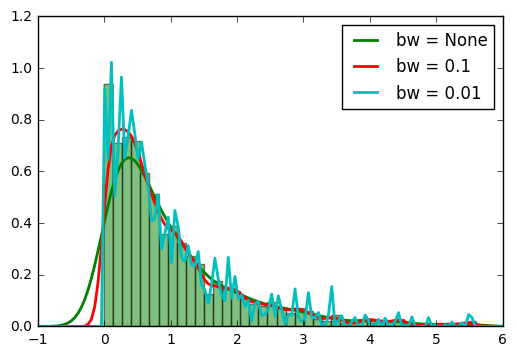

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats

# generate data samples
data = scipy.stats.expon.rvs(loc=0, scale=1, size=1000, random_state=123)

# test values for the bw_method option ('None' is the default value)
bw_values =  [None, 0.1, 0.01]

# generate a list of kde estimators for each bw
kde = [scipy.stats.gaussian_kde(data,bw_method=bw) for bw in bw_values]

# plot (normalized) histogram of the data
plt.hist(data, 50, normed=1, facecolor='green', alpha=0.5);

# plot density estimates
t_range = np.linspace(-2,8,200)
for i, bw in enumerate(bw_values):
    plt.plot(t_range,kde[i](t_range),lw=2, label='bw = '+str(bw))
plt.xlim(-1,6)
plt.legend(loc='best')

Note that large bw values result in a smoother pdf estimate, however, with the cost (in this example) of suggesting negative values are possible, which is not the case here. [More info](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.gaussian_kde.set_bandwidth.html).

## Gradient Descent

At a theoretical level, gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.

![regression](regression.png)

Let’s suppose we want to model the above set of points with a line. To do this we’ll use the standard y = mx + b line equation where m is the line’s slope and b is the line’s y-intercept. To find the best line for our data, we need to find the best set of slope m and y-intercept b values.

A standard approach to solving this type of problem is to define an error function (also called a cost function) that measures how “good” a given line is. This function will take in a (m,b) pair and return an error value based on how well the line fits our data. To compute this error for a given line, we’ll iterate through each (x,y) point in our data set and sum the square distances between each point’s y value and the candidate line’s y value (computed at mx + b). 

![gradient](gradient.png)

Enter a function in one variable: x**2 + 2*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 10
x: -0.995001784897740
Minimum value: -0.999975017845792


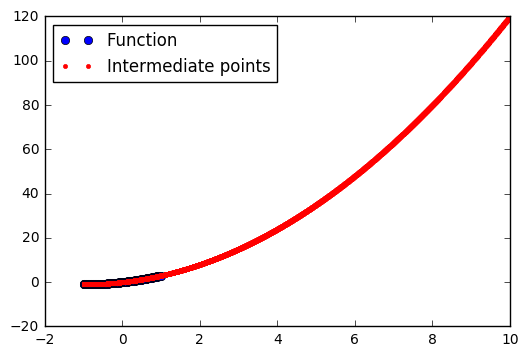

In [39]:
'''
grad_descent.py

Use gradient descent to find the minimum value of a
single variable function. This also checks for the existence
of a solution for the equation, f'(x)=0 and plots the intermediate
points traversed.
'''

from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

def grad_descent(x0, f1x, x):
    # check if f1x=0 has a solution
    if not solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return None
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()

    # list to store the X values traversed
    X_traversed = []
    while abs(x_old - x_new) > epsilon:
        X_traversed.append(x_new)
        x_old = x_new
        x_new = x_old-step_size*f1x.subs({x:x_old}).evalf()

    return x_new, X_traversed

def frange(start, final, interval):

    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
    
    return numbers

def create_plot(X_traversed, f, var):
    # First create the graph of the function itself
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({var:x}) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    # calculate the function value at each of the intermediate
    # points traversed
    f_traversed = [f.subs({var:x}) for x in X_traversed]
    plt.plot(X_traversed, f_traversed, 'r.')
    plt.legend(['Function', 'Intermediate points'], loc='best')
    plt.show()

if __name__ == '__main__':

    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        if var_min:
            print('{0}: {1}'.format(var.name, var_min))
            print('Minimum value: {0}'.format(f.subs({var:var_min})))
            create_plot(X_traversed, f, var)


[INFO] starting training...
[INFO] epoch #1, loss=115.2888999
[INFO] epoch #2, loss=112.1808255
[INFO] epoch #3, loss=108.2292840
[INFO] epoch #4, loss=103.3205570
[INFO] epoch #5, loss=97.4002402
[INFO] epoch #6, loss=90.5143249
[INFO] epoch #7, loss=82.8403942
[INFO] epoch #8, loss=74.6882078
[INFO] epoch #9, loss=66.4562189
[INFO] epoch #10, loss=58.5527526
[INFO] epoch #11, loss=51.3133566
[INFO] epoch #12, loss=44.9485999
[INFO] epoch #13, loss=39.5364104
[INFO] epoch #14, loss=35.0486619
[INFO] epoch #15, loss=31.3911251
[INFO] epoch #16, loss=28.4400200
[INFO] epoch #17, loss=26.0677607
[INFO] epoch #18, loss=24.1575927
[INFO] epoch #19, loss=22.6099241
[INFO] epoch #20, loss=21.3435367
[INFO] epoch #21, loss=20.2941439
[INFO] epoch #22, loss=19.4118694
[INFO] epoch #23, loss=18.6585279
[INFO] epoch #24, loss=18.0051303
[INFO] epoch #25, loss=17.4297736
[INFO] epoch #26, loss=16.9159405
[INFO] epoch #27, loss=16.4511699
[INFO] epoch #28, loss=16.0260376
[INFO] epoch #29, loss=15

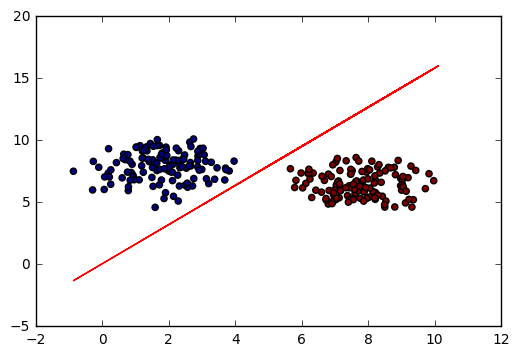

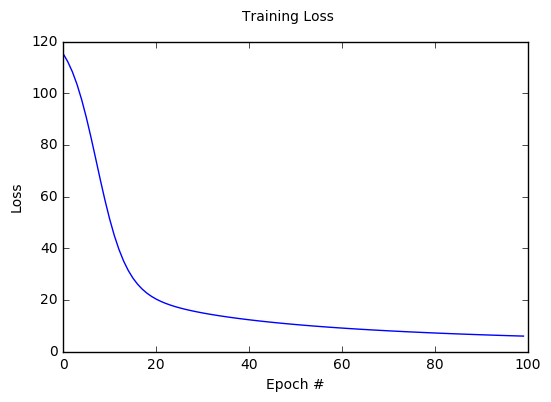

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse

def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

epochs = 100
alpha = 0.01

(X, y) = make_blobs(n_samples=250, n_features=2, centers=2,
    cluster_std=1.05, random_state=20)


X = np.c_[np.ones((X.shape[0])), X]

print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))

lossHistory = []

for epoch in np.arange(0, epochs):
    preds = sigmoid_activation(X.dot(W))
    error = preds - y
    loss = np.sum(error ** 2)
    lossHistory.append(loss)
    print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))

    gradient = X.T.dot(error) / X.shape[0]
    W += -alpha * gradient

for i in np.random.choice(250, 10):
    activation = sigmoid_activation(X[i].dot(W))
    label = 0 if activation < 0.5 else 1

    print("activation={:.4f}; predicted_label={}, true_label={}".format(
        activation, label, y[i]))

Y = (-W[0] - (W[1] * X)) / W[2]

plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()